In [85]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris, load_wine
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

In [97]:
# Load dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target variable
df['setosa'] = iris.target

# Map target numbers to species names
df['setosa'] = df['setosa'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Now let's map species names back to a binary classification of setosa or not
df['setosa'] = df['setosa'].map({'setosa': 1, 'versicolor': 0, 'virginica': 0})

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [101]:
# Get X data
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df["setosa"]

# Split data into 70%/30% ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# instantiate the model
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict y using logression model
y_pred = logreg.predict(X_test)

# Get confusion matrix and print
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

# True Positives
TP = cnf_matrix[1, 1]
# True Negatives
TN = cnf_matrix[0, 0]
# False Positives
FP = cnf_matrix[0, 1]
# False Negatives
FN = cnf_matrix[1, 0]


# Calculate accuracy, precision, recall, and F1-score
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)
# Print each
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

[[30  0]
 [ 0 15]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


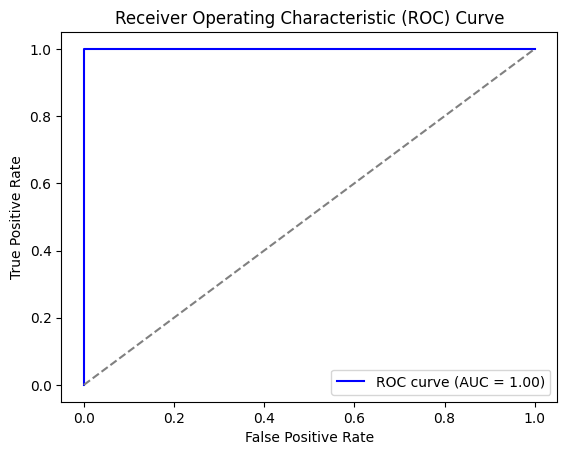

As talked about in class, the area under the ROC curve summarizes the classifier's ability to distinguish between true and false positives, 
plotting them on the y and x axis, respectively.
From this curve we can see it always correctly identifies setosas (1.0 TPR) and never falsely identifies non-setosas as setosas (0.0 FPR).
This is visualized by our classifier having a 1.0 TPR even at 0.0 FPR, and its area under the curve is 1.0, showing a perfect classifier.


In [104]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# Create a figure
fig = plt.figure()

# Plot ROC curve on the figure
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Interpret plot
print(f"As talked about in class, the area under the ROC curve summarizes the classifier's ability to distinguish between true and false positives, \n" + "plotting them on the y and x axis, respectively.\n"
      f"From this curve we can see it always correctly identifies setosas (1.0 TPR) and never falsely identifies non-setosas as setosas (0.0 FPR).\n"
      f"This is visualized by our classifier having a 1.0 TPR even at 0.0 FPR, and its area under the curve is {auc_score}, showing a perfect classifier.")


In [107]:
#Load the Wine dataset
X, y = load_wine(return_X_y = True)

# Split data into 75%/25% split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Initialize three different SVM models with different kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly')

# Put these into list so we can use a for loop so I don't have to retype code over and over
svm_models = {'linear': svm_linear, 'rbf': svm_rbf, 'poly': svm_poly}
for kernel, model in svm_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Since we are doing a multi-class classifier, we need to specify how these metrics will be calculated.
    # Decided to use weighted metric, which 'Calculates metrics for each label, and then takes the average,
    # weighted by the number of true instances for each class.'
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{kernel} kernel metrics. Accuracy: {accuracy}. Precision: {precision}. Recall: {recall}. F1-score: {f1}")

print(f'\n')
print('Looking at the metrics data, it is apparent that the linear model performs far better than the polynomial model, which is slightly better than the rbf model.')
print('This conclusion was drawn from the fact that the accuracy, precision, recall, and F1-score for the linear SVM are far higher than both the rbf and poly.')
print('All of these metrics indicate that the linear model is performing well on this dataset, for example, it correctly identifies 97.8% of wines (TPR).')
print('The polynomial model does slightly better than the rbf for all metrics except the precision score, which leads me to conclude it is a slightly better kernel for identifying wines.')
print('In all, all three kernels are better than if we just randomly guessed at the wines using their proportion in the dataset, and the linear SVM is the best.')

linear kernel metrics. Accuracy: 0.9777777777777777. Precision: 0.980246913580247. Recall: 0.9777777777777777. F1-score: 0.9781603698389925
rbf kernel metrics. Accuracy: 0.8222222222222222. Precision: 0.841111111111111. Recall: 0.8222222222222222. F1-score: 0.829843323522841
poly kernel metrics. Accuracy: 0.8444444444444444. Precision: 0.8391452991452992. Recall: 0.8444444444444444. F1-score: 0.8309244104988787


Looking at the metrics data, it is apparent that the linear model performs far better than the polynomial model, which is slightly better than the rbf model.
This conclusion was drawn from the fact that the accuracy, precision, recall, and F1-score for the linear SVM are far higher than both the rbf and poly.
All of these metrics indicate that the linear model is performing well on this dataset, for example, it correctly identifies 97.8% of wines (TPR).
The polynomial model does slightly better than the rbf for all metrics except the precision score, which leads me to conclude